# Running Calculations on GPU

## Check if we can access the GPU

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17574014818920066033
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3099656192
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4377340096950797378
physical_device_desc: "device: 0, name: Quadro P1000, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

# Baby Steps for ML/DL

## Training a Simple Numpy data 

In [54]:
import numpy as np
import tensorflow as tf
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.backend.tensorflow_backend import set_session
import matplotlib.pyplot as plt
%matplotlib inline

import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

### Standard Imports

In [3]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn
%matplotlib inline
import pandas as pd
import pprint
import math
import random
# from tabulate import tabulate

### Note
{0: 'Water', 1: 'Mountains', 2: 'Polar_Caps', 3: 'Forest', 4: 'Desert'}

{0: 'train', 1: 'test', 2: 'validation'}

# Running on 512x512 images

In [52]:
def plot_confusion_matrix(y_true, y_pred, normalize=False, title=None, cmap=plt.cm.Blues,figuresize=(10,10)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    classes = ['Desert', 'Mountains', 'Forest','Water','Polar Caps']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=figuresize)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.figure
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
#     fig.tight_layout()
    return ax

In [8]:
projectpath = "/home/lokeshmishra/PaleBlueDot/BernPhD/Projects/Terrain_Classifier/terrain_classifier"
df_training_50_2_512_512 = pd.read_pickle(projectpath+'/traincomposite_50_2_512_512.df')
df_training_50_4_512_512 = pd.read_pickle(projectpath+'/traincomposite_50_4_512_512.df')
df_training_50_6_512_512 = pd.read_pickle(projectpath+'/traincomposite_50_6_512_512.df')
df_testing_30_2_512_512 = pd.read_pickle(projectpath+'/testcomposite_30_2_512_512.df')
df_testing_30_4_512_512 = pd.read_pickle(projectpath+'/testcomposite_30_4_512_512.df')
df_testing_30_6_512_512 = pd.read_pickle(projectpath+'/testcomposite_30_6_512_512.df')
dict_dfnames = {0: df_training_50_2_512_512, 1:df_training_50_4_512_512,2:df_training_50_6_512_512}
dict_dfnames_test = {0:df_testing_30_2_512_512, 1:df_testing_30_4_512_512,2:df_testing_30_6_512_512}

## First create numpy array of training samples

In [9]:
# The following piece of code works well only when the number of iterations is exactly known!
# This is due to the usage of while loop!

index=[]
iterations = 150
nfiles = 50
size = 512
check = []
imagetrain512 = np.zeros((iterations,size,size,3),dtype = 'int')
temp2 = np.zeros((iterations,size,size,1),dtype='int')
labeltrain512 = np.zeros((iterations,size,size,5),dtype = 'int')
#Get random images and put them in an array
while len(index) < iterations:
    a = np.random.randint(0, high=3)
    b = np.random.randint(0, high=nfiles)
    c = len(index)
    
    if ((a,b)) not in check:
        imagetrain512[c,:,:,:]=dict_dfnames[a].iloc[1, b]
        temp2[c,:,:,:]=dict_dfnames[a].iloc[0,b]
        check.append((a,b))
        index.append(c)
print('Done with part 1')
# Fix the label array as required by the model
for c in np.arange(iterations):
    for ind1 in np.arange(size):
        for ind2 in np.arange(size):
            if temp2[c,ind1,ind2] == 0:
                labeltrain512[c,ind1,ind2]=[1,0,0,0,0]
            elif temp2[c,ind1,ind2] == 1:
                labeltrain512[c,ind1,ind2]=[0,1,0,0,0]
            elif temp2[c,ind1,ind2] == 2:
                labeltrain512[c,ind1,ind2]=[0,0,1,0,0]
            elif temp2[c,ind1,ind2] == 3:
                labeltrain512[c,ind1,ind2]=[0,0,0,1,0]
            elif temp2[c,ind1,ind2] == 4:
                labeltrain512[c,ind1,ind2]=[0,0,0,0,1]
# print(index)
print(imagetrain512.shape, labeltrain512.shape)

Done with part 1
(150, 512, 512, 3) (150, 512, 512, 5)


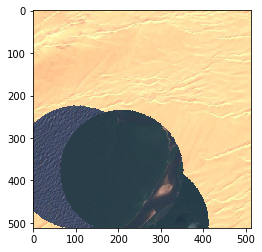

In [10]:
#Sanity check

plt.imshow(imagetrain512[11])

## Create numpy array for testing samples

In [11]:
# The following piece of code works well only when the number of iterations is exactly known!
# This is due to the usage of while loop!

index=[]
nfiles = 30
iterations = nfiles*3
size = 512
check = []
imagetest512 = np.zeros((iterations,size,size,3),dtype = 'int')
temp2 = np.zeros((iterations,size,size,1),dtype='int')
labeltest512 = np.zeros((iterations,size,size,5),dtype = 'int')
#Get random images and put them in an array
while len(index) < iterations:
    a = np.random.randint(0, high=3)
    b = np.random.randint(0, high=nfiles)
    c = len(index)
    
    if ((a,b)) not in check:
        imagetest512[c,:,:,:]=dict_dfnames[a].iloc[1, b]
        temp2[c,:,:,:]=dict_dfnames[a].iloc[0,b]
        check.append((a,b))
        index.append(c)
#         print('Current run number is %d of %d'%(len(index),iterations))
print('Done with part 1')
# Fix the label array as required by the model
for c in np.arange(iterations):
    for ind1 in np.arange(size):
        for ind2 in np.arange(size):
            if temp2[c,ind1,ind2] == 0:
                labeltest512[c,ind1,ind2]=[1,0,0,0,0]
            elif temp2[c,ind1,ind2] == 1:
                labeltest512[c,ind1,ind2]=[0,1,0,0,0]
            elif temp2[c,ind1,ind2] == 2:
                labeltest512[c,ind1,ind2]=[0,0,1,0,0]
            elif temp2[c,ind1,ind2] == 3:
                labeltest512[c,ind1,ind2]=[0,0,0,1,0]
            elif temp2[c,ind1,ind2] == 4:
                labeltest512[c,ind1,ind2]=[0,0,0,0,1]
# print(index)
print(imagetest512.shape, labeltest512.shape)

Done with part 1
(90, 512, 512, 3) (90, 512, 512, 5)


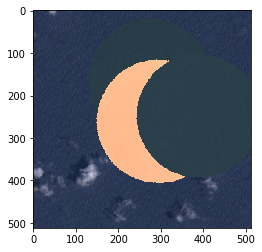

In [12]:
#Sanity check

plt.imshow(imagetest512[11])

# Now we have 150 training samples and 90 testing sample. They are made of 3 types of images of 2,4 and 6 terrains.

# Define the model

In [14]:
model512_1 = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model512_1.add(Dense(64, activation='relu',input_shape=(512,512,3)))
# Add another:
model512_1.add(Dense(64, activation='relu'))
# Add another:
model512_1.add(Dense(64, activation='relu'))
# Add another:
model512_1.add(Dense(64, activation='relu'))
# Add a softmax layer with output units:
model512_1.add(Dense(5, activation='softmax'))

model512_1.compile(optimizer=Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
print(model512_1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512, 512, 64)      256       
_________________________________________________________________
dense_2 (Dense)              (None, 512, 512, 64)      4160      
_________________________________________________________________
dense_3 (Dense)              (None, 512, 512, 64)      4160      
_________________________________________________________________
dense_4 (Dense)              (None, 512, 512, 64)      4160      
_________________________________________________________________
dense_5 (Dense)              (None, 512, 512, 5)       325       
Total params: 13,061
Trainable params: 13,061
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
from keras.utils.vis_utils import plot_model
plot_model(model512_1, to_file='model.png', show_shapes=True,show_layer_names=True)

In [18]:
training512_1 = model512_1.fit(imagetrain512[:120],labeltrain512[:120],validation_data = (imagetrain512[120:],labeltrain512[120:]),epochs=100,batch_size=4, verbose=1)

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 18s 153ms/step - loss: 4.1184 - acc: 0.3137 - val_loss: 1.3697 - val_acc: 0.5514
Epoch 2/100
120/120 [==============================] - 18s 147ms/step - loss: 1.0356 - acc: 0.5934 - val_loss: 0.9180 - val_acc: 0.7006
Epoch 3/100
120/120 [==============================] - 18s 147ms/step - loss: 0.8798 - acc: 0.7105 - val_loss: 0.8473 - val_acc: 0.6956
Epoch 4/100
120/120 [==============================] - 18s 146ms/step - loss: 0.7550 - acc: 0.7507 - val_loss: 0.8486 - val_acc: 0.7390
Epoch 5/100
120/120 [==============================] - 18s 146ms/step - loss: 0.7388 - acc: 0.7463 - val_loss: 0.7004 - val_acc: 0.7724
Epoch 6/100
120/120 [==============================] - 18s 149ms/step - loss: 0.7287 - acc: 0.7199 - val_loss: 0.7564 - val_acc: 0.6868
Epoch 7/100
120/120 [==============================] - 18s 147ms/step - loss: 0.6551 - acc: 0.7322 - val_loss: 0.6600 - val_acc: 0.7568
Epo

In [20]:
test512_1 = model512_1.evaluate(imagetest512[:],labeltest512[:], batch_size=4, verbose=1)
print('The loss is %f and the accuracy is %f' %(test512_1[0],test512_1[1]))

90/90 [==============================] - 5s 60ms/step
The loss is 0.206476 and the accuracy is 0.938157


## Optimize Learning Rate, Layers

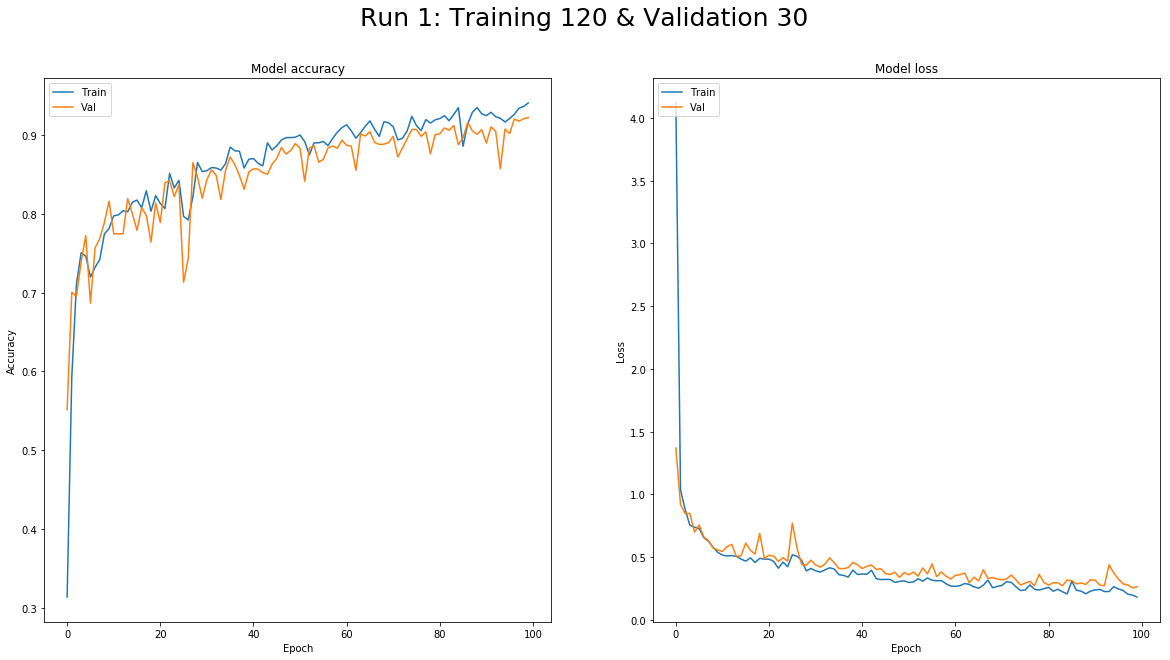

In [28]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Run 1: Training 120 & Validation 30', fontsize = 25)
# Plot training & validation accuracy values
fig.add_subplot(121)
plt.plot(training512_1.history['acc'])
plt.plot(training512_1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')


# Plot training & validation loss values
fig.add_subplot(122)
plt.plot(training512_1.history['loss'])
plt.plot(training512_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


fig.savefig(projectpath+'/512by512_run2/'+'run1.png',dpi=600)

In [22]:
# Let's save this model:
model512_1.save(projectpath+'/512by512_run2/'+'/model512_1.h5')

## Continue training to improve further? (reduce learning rate)

In [46]:
model512_1.compile(optimizer=Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
training512_1b = model512_1.fit(imagetrain512[:120],labeltrain512[:120],validation_data = (imagetrain512[120:],labeltrain512[120:]),epochs=50,batch_size=4, verbose=1)

Train on 120 samples, validate on 30 samples
Epoch 1/50
120/120 [==============================] - 18s 146ms/step - loss: 0.1866 - acc: 0.9383 - val_loss: 0.2428 - val_acc: 0.9217
Epoch 2/50
120/120 [==============================] - 18s 149ms/step - loss: 0.1963 - acc: 0.9324 - val_loss: 0.3210 - val_acc: 0.9170
Epoch 3/50
120/120 [==============================] - 18s 147ms/step - loss: 0.2107 - acc: 0.9304 - val_loss: 0.2289 - val_acc: 0.9283
Epoch 4/50
120/120 [==============================] - 18s 149ms/step - loss: 0.1956 - acc: 0.9367 - val_loss: 0.2493 - val_acc: 0.9174
Epoch 5/50
120/120 [==============================] - 17s 144ms/step - loss: 0.1806 - acc: 0.9388 - val_loss: 0.3382 - val_acc: 0.9056
Epoch 6/50
120/120 [==============================] - 18s 149ms/step - loss: 0.2332 - acc: 0.9266 - val_loss: 0.2573 - val_acc: 0.9238
Epoch 7/50
120/120 [==============================] - 18s 152ms/step - loss: 0.1990 - acc: 0.9358 - val_loss: 0.2481 - val_acc: 0.9212
Epoch 8/50

In [25]:
test512_1b = model512_1.evaluate(imagetest512[:],labeltest512[:], batch_size=4, verbose=1)
print('The loss is %f and the accuracy is %f' %(test512_1b[0],test512_1b[1]))

90/90 [==============================] - 5s 60ms/step
The loss is 0.160745 and the accuracy is 0.950556


In [26]:
# Let's save this model:
model512_1.save(projectpath+'/model512_1b.h5')

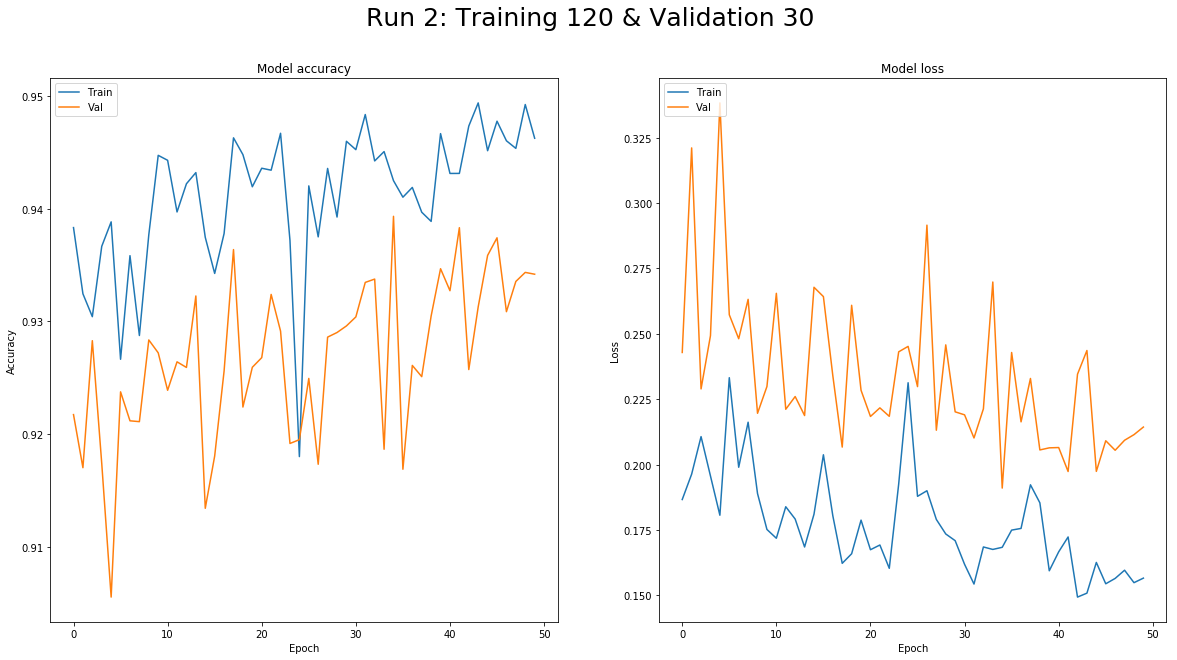

In [27]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Run 2: Training 120 & Validation 30', fontsize = 25)
# Plot training & validation accuracy values
fig.add_subplot(121)
plt.plot(training512_1b.history['acc'])
plt.plot(training512_1b.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')


# Plot training & validation loss values
fig.add_subplot(122)
plt.plot(training512_1b.history['loss'])
plt.plot(training512_1b.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

fig.savefig(projectpath+'/512by512_run2/'+'run2.png',dpi=600)

## Continue training to improve further? (reduce learning rate)

In [29]:
model512_1.compile(optimizer=Adam(0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
training512_1c = model512_1.fit(imagetrain512[:120],labeltrain512[:120],validation_data = (imagetrain512[120:],labeltrain512[120:]),epochs=50,batch_size=4, verbose=1)

Train on 120 samples, validate on 30 samples
Epoch 1/50
120/120 [==============================] - 18s 149ms/step - loss: 0.1444 - acc: 0.9547 - val_loss: 0.2045 - val_acc: 0.9360
Epoch 2/50
120/120 [==============================] - 18s 147ms/step - loss: 0.1382 - acc: 0.9549 - val_loss: 0.1995 - val_acc: 0.9363
Epoch 3/50
120/120 [==============================] - 18s 147ms/step - loss: 0.1354 - acc: 0.9550 - val_loss: 0.1969 - val_acc: 0.9368
Epoch 4/50
120/120 [==============================] - 18s 148ms/step - loss: 0.1343 - acc: 0.9550 - val_loss: 0.1952 - val_acc: 0.9371
Epoch 5/50
120/120 [==============================] - 17s 144ms/step - loss: 0.1335 - acc: 0.9550 - val_loss: 0.1944 - val_acc: 0.9371
Epoch 6/50
120/120 [==============================] - 17s 145ms/step - loss: 0.1329 - acc: 0.9550 - val_loss: 0.1931 - val_acc: 0.9375
Epoch 7/50
120/120 [==============================] - 18s 149ms/step - loss: 0.1324 - acc: 0.9551 - val_loss: 0.1930 - val_acc: 0.9375
Epoch 8/50

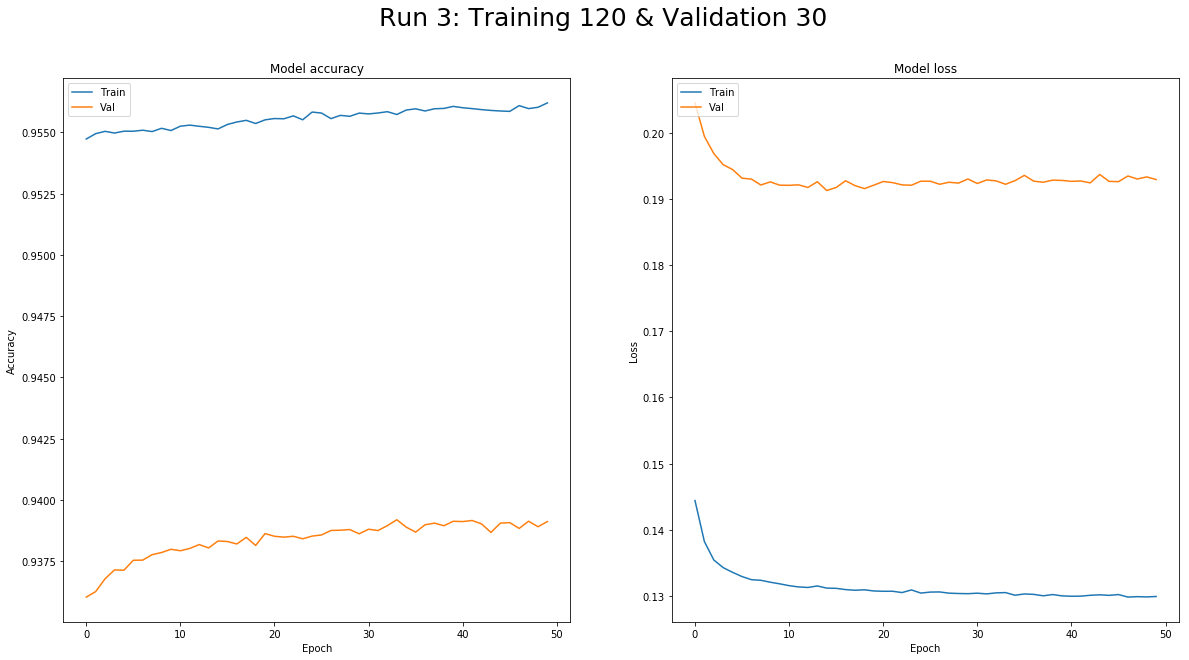

In [32]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Run 3: Training 120 & Validation 30', fontsize = 25)
# Plot training & validation accuracy values
fig.add_subplot(121)
plt.plot(training512_1c.history['acc'])
plt.plot(training512_1c.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')


# Plot training & validation loss values
fig.add_subplot(122)
plt.plot(training512_1c.history['loss'])
plt.plot(training512_1c.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

fig.savefig(projectpath+'/512by512_run2/'+'run3.png',dpi=600)

In [34]:
test512_1c = model512_1.evaluate(imagetest512[:],labeltest512[:], batch_size=4,verbose=1)
print('The loss is %f and the accuracy is %f' %(test512_1c[0],test512_1c[1]))

90/90 [==============================] - 5s 60ms/step
The loss is 0.141976 and the accuracy is 0.953035


In [39]:
predictedlabels_512_2c = model512_1.predict(imagetest512[:], batch_size=4)
predictedlabels_512_2c.shape

(90, 512, 512, 5)

In [36]:
# Let's save this model:
model512_1.save(projectpath+'/model512_1c.h5')

## Evaluate Performance

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

## We will first convert labels to 0,1,2,3 or 4

In [40]:
# Convert Labels for Testing Set
iterations = 90
size = 512
# Create Arrays 
predictedlabels_int_512_2c = np.zeros((iterations,size,size,1),dtype = 'int')
predictedlabels_rgb_512_2c = np.zeros((iterations,size,size,3),dtype = 'int')
testlabels_int_512 = np.zeros((iterations,size,size,1), dtype='int')
testlabels_rgb_512 = np.zeros((iterations,size,size,3),dtype = 'int')
# There are 90 files in the testing arena:
for nimage in np.arange(iterations):
    print('I am reading image %d of %d'%(nimage,iterations))
    for ind1 in np.arange(size):
        for ind2 in np.arange(size):
            maxval = np.amax(predictedlabels_512_2c[nimage,ind1,ind2])
            for nclass in np.arange(5):
                if predictedlabels_512_2c[nimage,ind1,ind2][nclass] == maxval:
                    predictedlabels_int_512_2c[nimage,ind1,ind2] = nclass
                if labeltest512[nimage,ind1,ind2][nclass]== 1:
                    testlabels_int_512[nimage,ind1,ind2] = nclass
            
            # Color the predictions for visualization
            if predictedlabels_int_512_2c[nimage,ind1,ind2]==0:
                predictedlabels_rgb_512_2c[nimage,ind1,ind2] = np.array([51, 102, 255])
            elif predictedlabels_int_512_2c[nimage,ind1,ind2]==1:
                predictedlabels_rgb_512_2c[nimage,ind1,ind2] = np.array([102, 153, 153])
            elif predictedlabels_int_512_2c[nimage,ind1,ind2]==2:
                predictedlabels_rgb_512_2c[nimage,ind1,ind2] = np.array([255, 255, 255])
            elif predictedlabels_int_512_2c[nimage,ind1,ind2]==3:
                predictedlabels_rgb_512_2c[nimage,ind1,ind2] = np.array([0, 204, 0])
            elif predictedlabels_int_512_2c[nimage,ind1,ind2]==4:
                predictedlabels_rgb_512_2c[nimage,ind1,ind2] = np.array([255, 153, 0])
      
    # do the same for original testing images for easier comparison
            if testlabels_int_512[nimage,ind1,ind2]==0:
                testlabels_rgb_512[nimage,ind1,ind2] = np.array([51, 102, 255])
            elif testlabels_int_512[nimage,ind1,ind2]==1:
                testlabels_rgb_512[nimage,ind1,ind2] = np.array([102, 153, 153])
            elif testlabels_int_512[nimage,ind1,ind2]==2:
                testlabels_rgb_512[nimage,ind1,ind2] = np.array([255, 255, 255])
            elif testlabels_int_512[nimage,ind1,ind2]==3:
                testlabels_rgb_512[nimage,ind1,ind2] = np.array([0, 204, 0])
            elif testlabels_int_512[nimage,ind1,ind2]==4:
                testlabels_rgb_512[nimage,ind1,ind2] = np.array([255, 153, 0])      

predictedlabels_int_512_2c.shape,predictedlabels_rgb_512_2c.shape,testlabels_int_512.shape,testlabels_rgb_512.shape

I am reading image 0 of 90
I am reading image 1 of 90
I am reading image 2 of 90
I am reading image 3 of 90
I am reading image 4 of 90
I am reading image 5 of 90
I am reading image 6 of 90
I am reading image 7 of 90
I am reading image 8 of 90
I am reading image 9 of 90
I am reading image 10 of 90
I am reading image 11 of 90
I am reading image 12 of 90
I am reading image 13 of 90
I am reading image 14 of 90
I am reading image 15 of 90
I am reading image 16 of 90
I am reading image 17 of 90
I am reading image 18 of 90
I am reading image 19 of 90
I am reading image 20 of 90
I am reading image 21 of 90
I am reading image 22 of 90
I am reading image 23 of 90
I am reading image 24 of 90
I am reading image 25 of 90
I am reading image 26 of 90
I am reading image 27 of 90
I am reading image 28 of 90
I am reading image 29 of 90
I am reading image 30 of 90
I am reading image 31 of 90
I am reading image 32 of 90
I am reading image 33 of 90
I am reading image 34 of 90
I am reading image 35 of 90
I 

((90, 512, 512, 1), (90, 512, 512, 3), (90, 512, 512, 1), (90, 512, 512, 3))

Normalized confusion matrix


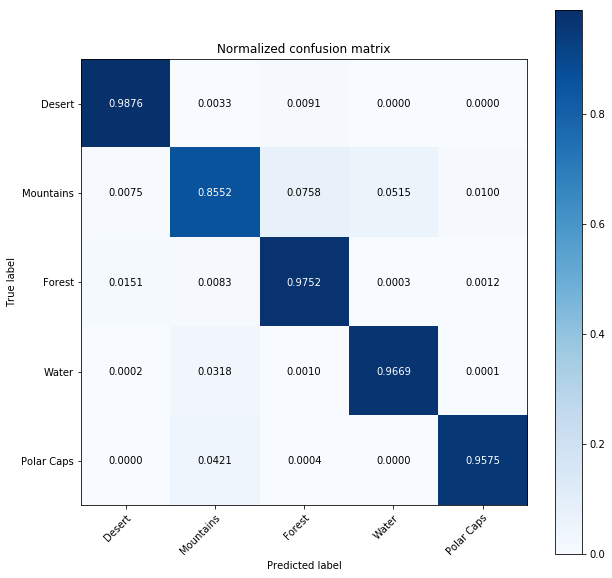

In [41]:
length = 90*512*512
truth_512 = np.reshape(testlabels_int_512,(length))
predicts_512 = np.reshape(predictedlabels_int_512_2c,(length))
truth_512.shape,predicts_512.shape 

cm_512 = plot_confusion_matrix(truth_512,predicts_512,normalize=True)

In [42]:
cm_512.figure.savefig(projectpath+'/512by512_run2/'+'cm.png',dpi=600)

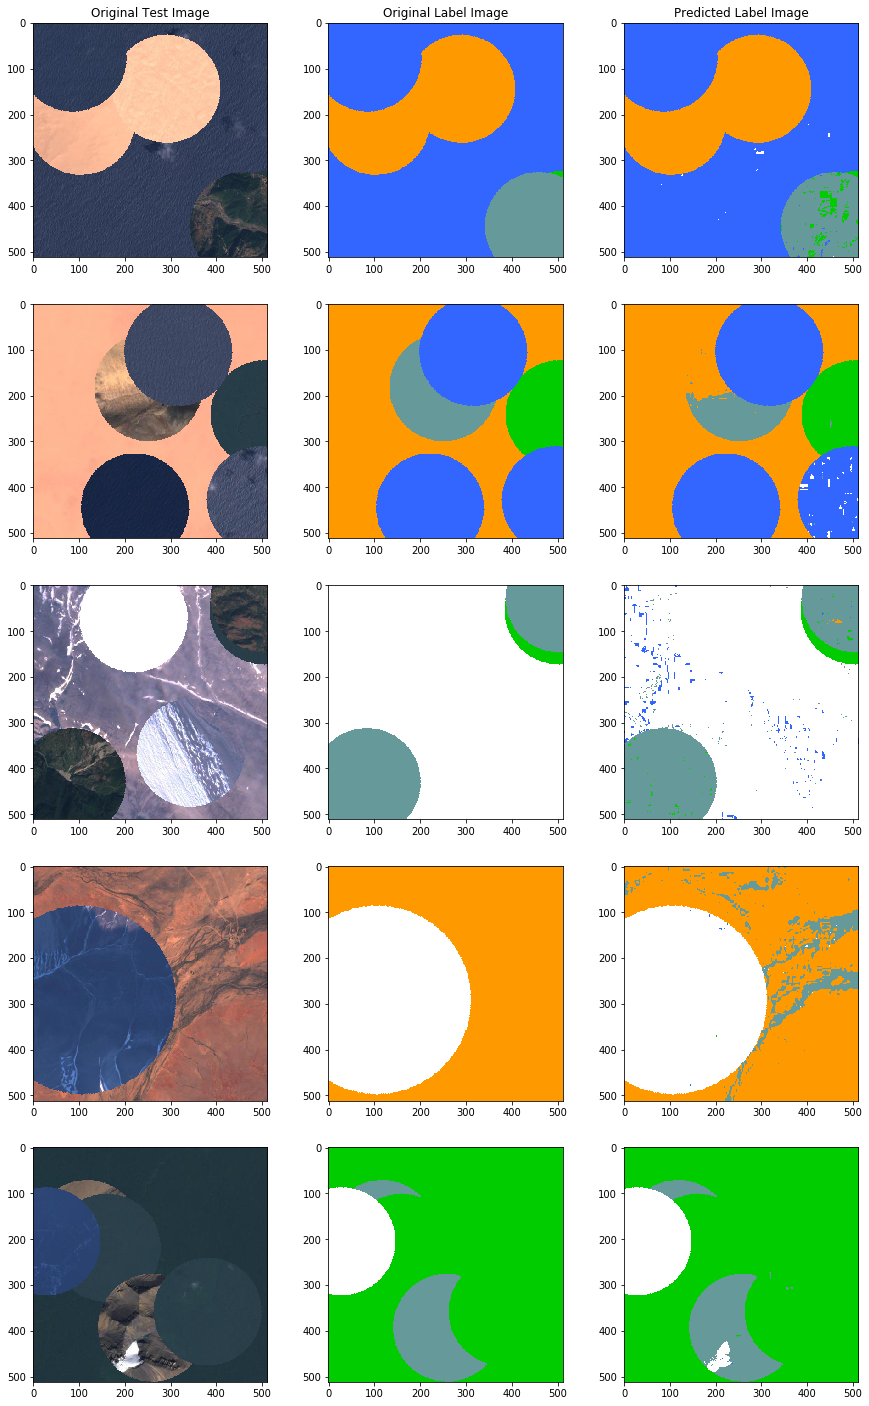

In [43]:
# Taking a look at 5 predicted samples
fig = plt.figure(figsize=(15,25))

ax0 = fig.add_subplot(531)
plt.imshow(imagetest512[0])
ax0.set_title('Original Test Image')

ax1 = fig.add_subplot(532)
plt.imshow(testlabels_rgb_512[0])
ax1.set_title('Original Label Image')

ax2 = fig.add_subplot(533)
plt.imshow(predictedlabels_rgb_512_2c[0])
ax2.set_title('Predicted Label Image')
#
fig.add_subplot(534)
plt.imshow(imagetest512[1])

fig.add_subplot(535)
plt.imshow(testlabels_rgb_512[1])

fig.add_subplot(536)
plt.imshow(predictedlabels_rgb_512_2c[1])
#
fig.add_subplot(537)
plt.imshow(imagetest512[2])

fig.add_subplot(538)
plt.imshow(testlabels_rgb_512[2])

fig.add_subplot(539)
plt.imshow(predictedlabels_rgb_512_2c[2])
#
fig.add_subplot(5,3,10)
plt.imshow(imagetest512[3])

fig.add_subplot(5,3,11)
plt.imshow(testlabels_rgb_512[3])

fig.add_subplot(5,3,12)
plt.imshow(predictedlabels_rgb_512_2c[3])
#
fig.add_subplot(5,3,13)
plt.imshow(imagetest512[4])

fig.add_subplot(5,3,14)
plt.imshow(testlabels_rgb_512[4])

fig.add_subplot(5,3,15)
plt.imshow(predictedlabels_rgb_512_2c[4])
#


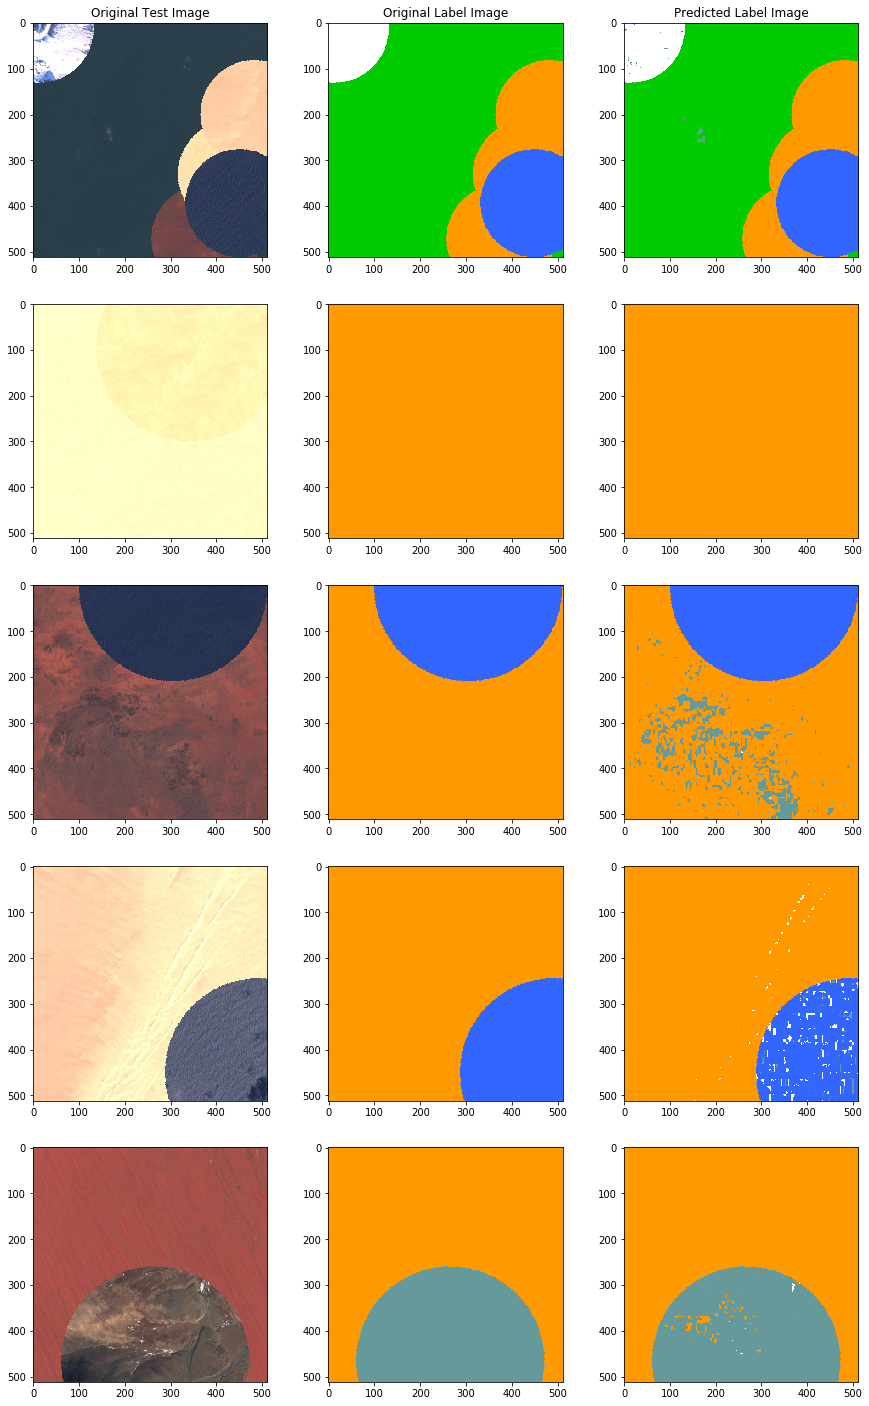

In [44]:
# Taking a look at 5 predicted samples#
fig = plt.figure(figsize=(15,25))

ax0 = fig.add_subplot(531)
plt.imshow(imagetest512[5])
ax0.set_title('Original Test Image')

ax1 = fig.add_subplot(532)
plt.imshow(testlabels_rgb_512[5])
ax1.set_title('Original Label Image')

ax2 = fig.add_subplot(533)
plt.imshow(predictedlabels_rgb_512_2c[5])
ax2.set_title('Predicted Label Image')
#
fig.add_subplot(534)
plt.imshow(imagetest512[6])

fig.add_subplot(535)
plt.imshow(testlabels_rgb_512[6])

fig.add_subplot(536)
plt.imshow(predictedlabels_rgb_512_2c[6])
#
fig.add_subplot(537)
plt.imshow(imagetest512[7])

fig.add_subplot(538)
plt.imshow(testlabels_rgb_512[7])

fig.add_subplot(539)
plt.imshow(predictedlabels_rgb_512_2c[7])
#
fig.add_subplot(5,3,10)
plt.imshow(imagetest512[8])

fig.add_subplot(5,3,11)
plt.imshow(testlabels_rgb_512[8])

fig.add_subplot(5,3,12)
plt.imshow(predictedlabels_rgb_512_2c[8])
#
fig.add_subplot(5,3,13)
plt.imshow(imagetest512[9])

fig.add_subplot(5,3,14)
plt.imshow(testlabels_rgb_512[9])

fig.add_subplot(5,3,15)
plt.imshow(predictedlabels_rgb_512_2c[9])
#


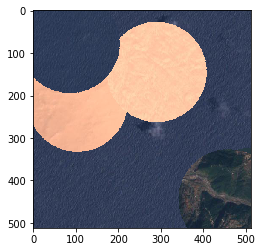

In [45]:
plt.imshow(imagetest512[0])

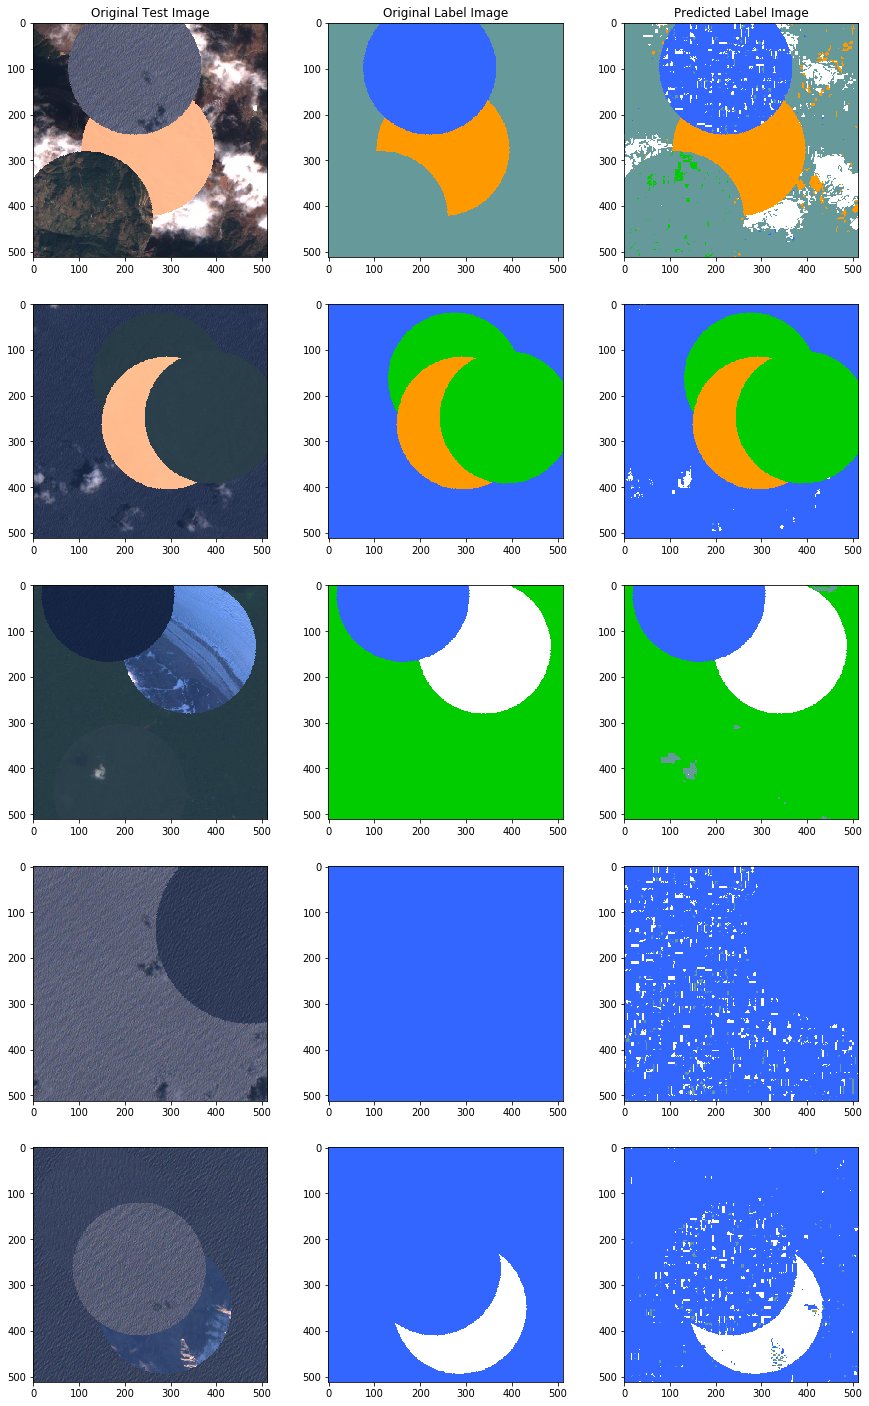

In [46]:
## Taking a look at 5 predicted samples
fig = plt.figure(figsize=(15,25))
imlist=np.arange(10,15)
ax0 = fig.add_subplot(531)
plt.imshow(imagetest512[imlist[0]])
ax0.set_title('Original Test Image')

ax1 = fig.add_subplot(532)
plt.imshow(testlabels_rgb_512[imlist[0]])
ax1.set_title('Original Label Image')

ax2 = fig.add_subplot(533)
plt.imshow(predictedlabels_rgb_512_2c[imlist[0]])
ax2.set_title('Predicted Label Image')
#
fig.add_subplot(534)
plt.imshow(imagetest512[imlist[1]])

fig.add_subplot(535)
plt.imshow(testlabels_rgb_512[imlist[1]])

fig.add_subplot(536)
plt.imshow(predictedlabels_rgb_512_2c[imlist[1]])
#
fig.add_subplot(537)
plt.imshow(imagetest512[imlist[2]])

fig.add_subplot(538)
plt.imshow(testlabels_rgb_512[imlist[2]])

fig.add_subplot(539)
plt.imshow(predictedlabels_rgb_512_2c[imlist[2]])
#
fig.add_subplot(5,3,10)
plt.imshow(imagetest512[imlist[3]])

fig.add_subplot(5,3,11)
plt.imshow(testlabels_rgb_512[imlist[3]])

fig.add_subplot(5,3,12)
plt.imshow(predictedlabels_rgb_512_2c[imlist[3]])
#
fig.add_subplot(5,3,13)
plt.imshow(imagetest512[imlist[4]])

fig.add_subplot(5,3,14)
plt.imshow(testlabels_rgb_512[imlist[4]])

fig.add_subplot(5,3,15)
plt.imshow(predictedlabels_rgb_512_2c[imlist[4]])
#


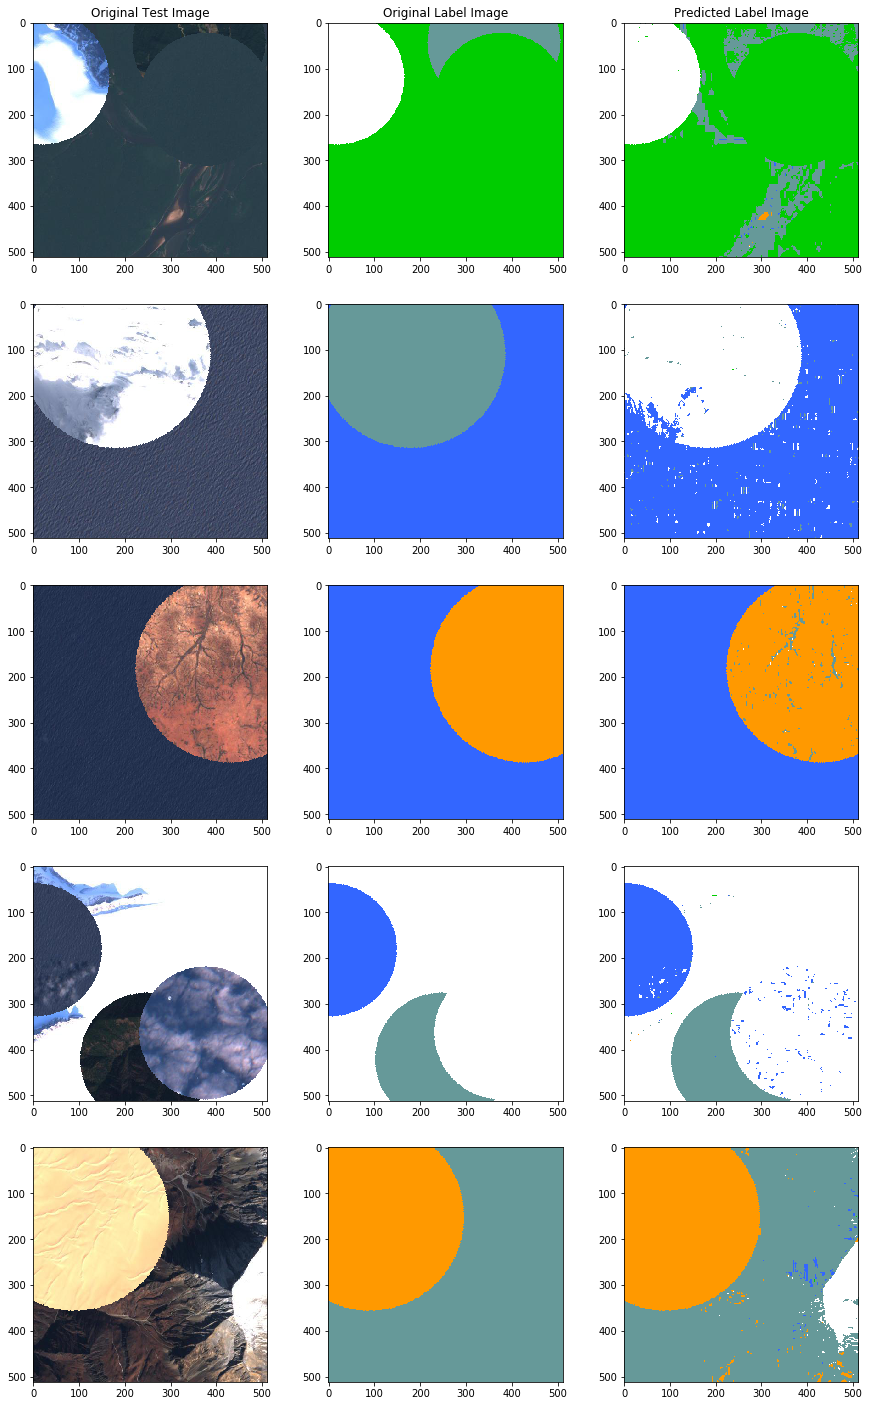

In [47]:
# Taking a look at 5 predicted samples#
fig = plt.figure(figsize=(15,25))
imlist=np.arange(15,20)
ax0 = fig.add_subplot(531)
plt.imshow(imagetest512[imlist[0]])
ax0.set_title('Original Test Image')

ax1 = fig.add_subplot(532)
plt.imshow(testlabels_rgb_512[imlist[0]])
ax1.set_title('Original Label Image')

ax2 = fig.add_subplot(533)
plt.imshow(predictedlabels_rgb_512_2c[imlist[0]])
ax2.set_title('Predicted Label Image')
#
fig.add_subplot(534)
plt.imshow(imagetest512[imlist[1]])

fig.add_subplot(535)
plt.imshow(testlabels_rgb_512[imlist[1]])

fig.add_subplot(536)
plt.imshow(predictedlabels_rgb_512_2c[imlist[1]])
#
fig.add_subplot(537)
plt.imshow(imagetest512[imlist[2]])

fig.add_subplot(538)
plt.imshow(testlabels_rgb_512[imlist[2]])

fig.add_subplot(539)
plt.imshow(predictedlabels_rgb_512_2c[imlist[2]])
#
fig.add_subplot(5,3,10)
plt.imshow(imagetest512[imlist[3]])

fig.add_subplot(5,3,11)
plt.imshow(testlabels_rgb_512[imlist[3]])

fig.add_subplot(5,3,12)
plt.imshow(predictedlabels_rgb_512_2c[imlist[3]])
#
fig.add_subplot(5,3,13)
plt.imshow(imagetest512[imlist[4]])

fig.add_subplot(5,3,14)
plt.imshow(testlabels_rgb_512[imlist[4]])

fig.add_subplot(5,3,15)
plt.imshow(predictedlabels_rgb_512_2c[imlist[4]])
#


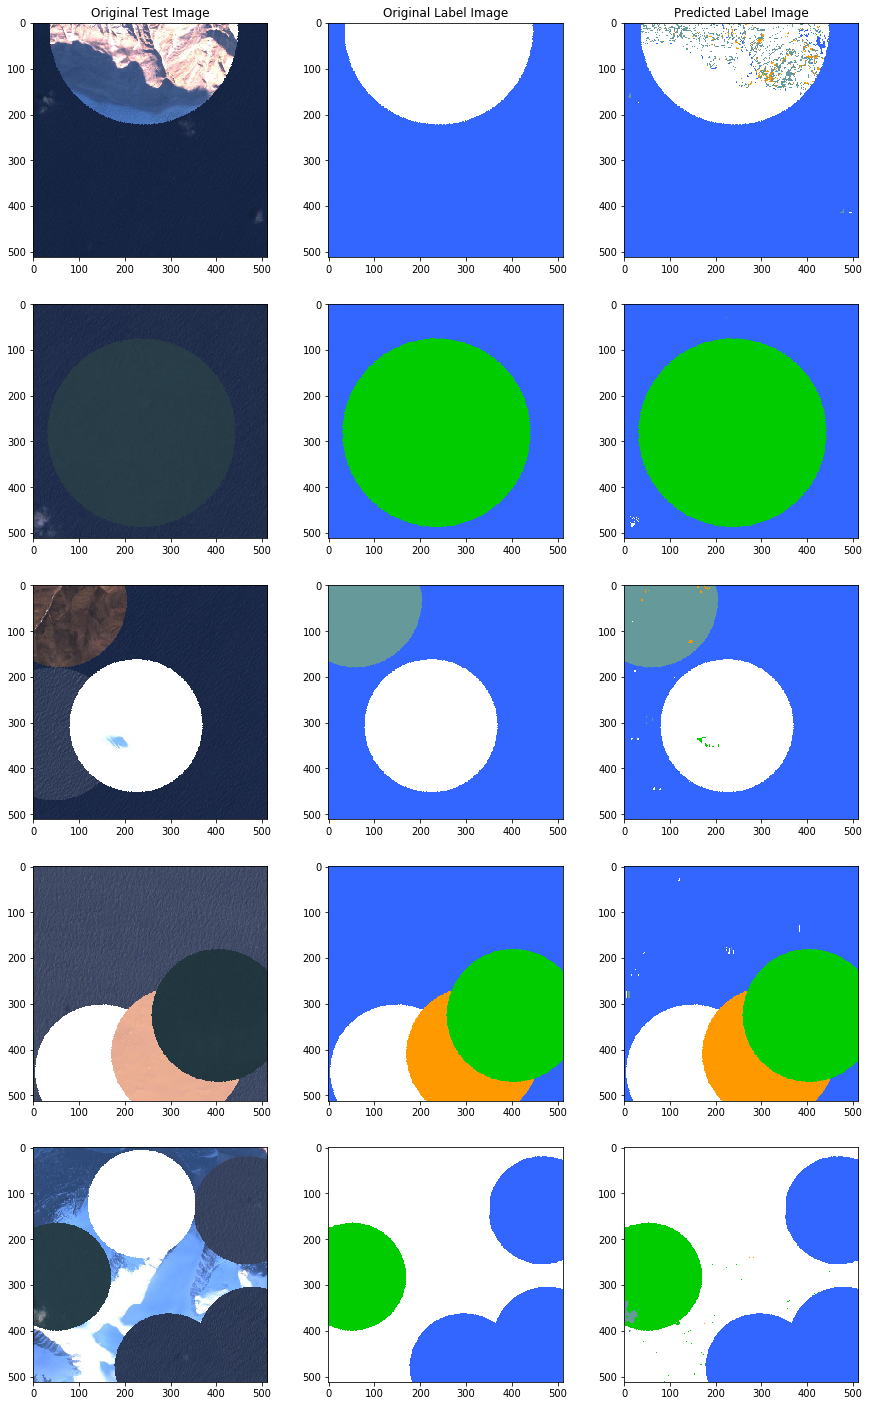

In [48]:
# Taking a look at 5 predicted samples#
fig = plt.figure(figsize=(15,25))
imlist=np.arange(20,25)
ax0 = fig.add_subplot(531)
plt.imshow(imagetest512[imlist[0]])
ax0.set_title('Original Test Image')

ax1 = fig.add_subplot(532)
plt.imshow(testlabels_rgb_512[imlist[0]])
ax1.set_title('Original Label Image')

ax2 = fig.add_subplot(533)
plt.imshow(predictedlabels_rgb_512_2c[imlist[0]])
ax2.set_title('Predicted Label Image')
#
fig.add_subplot(534)
plt.imshow(imagetest512[imlist[1]])

fig.add_subplot(535)
plt.imshow(testlabels_rgb_512[imlist[1]])

fig.add_subplot(536)
plt.imshow(predictedlabels_rgb_512_2c[imlist[1]])
#
fig.add_subplot(537)
plt.imshow(imagetest512[imlist[2]])

fig.add_subplot(538)
plt.imshow(testlabels_rgb_512[imlist[2]])

fig.add_subplot(539)
plt.imshow(predictedlabels_rgb_512_2c[imlist[2]])
#
fig.add_subplot(5,3,10)
plt.imshow(imagetest512[imlist[3]])

fig.add_subplot(5,3,11)
plt.imshow(testlabels_rgb_512[imlist[3]])

fig.add_subplot(5,3,12)
plt.imshow(predictedlabels_rgb_512_2c[imlist[3]])
#
fig.add_subplot(5,3,13)
plt.imshow(imagetest512[imlist[4]])

fig.add_subplot(5,3,14)
plt.imshow(testlabels_rgb_512[imlist[4]])

fig.add_subplot(5,3,15)
plt.imshow(predictedlabels_rgb_512_2c[imlist[4]])
#


## Load Last Model

In [15]:
from keras.models import load_model
loadedmodel = load_model(projectpath+'/512by512/model512_2c.h5')

In [16]:
test512_2c = loadedmodel.evaluate(imagetest512[:],labeltest512[:], batch_size=4,verbose=1)
print('The loss is %f and the accuracy is %f' %(test512_2c[0],test512_2c[1]))

90/90 [==============================] - 6s 64ms/step
The loss is 0.141841 and the accuracy is 0.952468


In [18]:
predictedlabels_512_2c = loadedmodel.predict(imagetest512[:], batch_size=4)
predictedlabels_512_2c.shape

(90, 512, 512, 5)

## Evaluate Performance

In [21]:
#Before calculating cm with 0diagonals - run the code to convert the output to the desired format!

Normalized confusion matrix


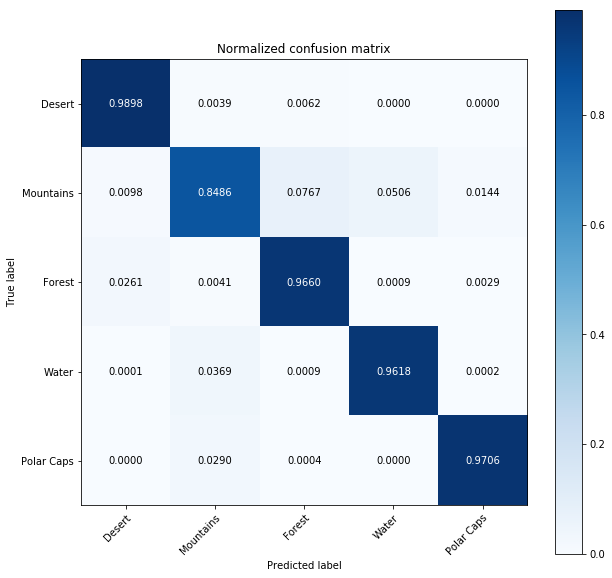

In [22]:
length = 90*512*512
truth_512 = np.reshape(testlabels_int_512,(length))
predicts_512 = np.reshape(predictedlabels_int_512_2c,(length))
truth_512.shape,predicts_512.shape 

cm_512 = plot_confusion_matrix(truth_512,predicts_512,normalize=True)

Confusion matrix, without normalization


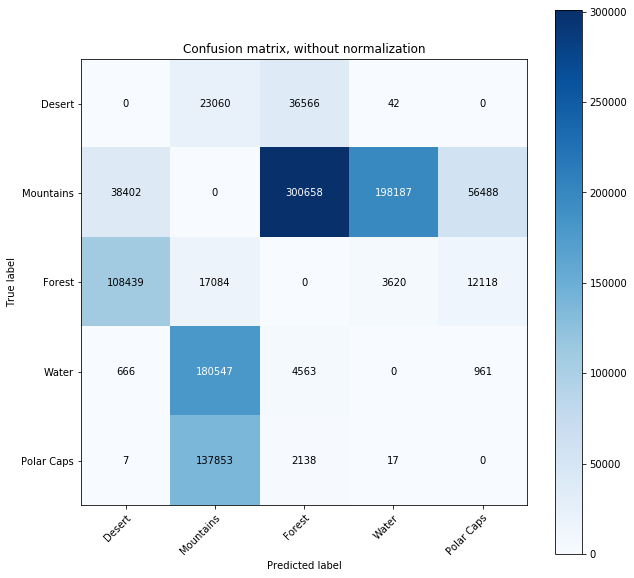

In [71]:
plot_confusion_matrix_0_diagonals(truth_512,predicts_512)

In [56]:
def plot_confusion_matrix_with0_diagonals(y_true, y_pred, normalize=False, title=None, cmap=plt.cm.Blues,figuresize=(20,10)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    classes = ['Desert', 'Mountains', 'Forest','Water','Polar Caps']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #copy normalized cm
    cm0=cm
    fig = plt.figure(figsize=figuresize)
    ax1 = fig.add_subplot(121)
    im1 = ax1.imshow(cm, interpolation='nearest', cmap=cmap)
    ax1.figure.colorbar(im1, ax=ax1)
    ax1.figure
    # We want to show all ticks...
    ax1.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Prediction VS Truth',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax1.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
## do same for cm0            
    np.fill_diagonal(cm0,0)
    ax2 = fig.add_subplot(122)
    im2 = ax2.imshow(cm0, interpolation='nearest', cmap=plt.cm.Reds)
    ax2.figure.colorbar(im2, ax=ax2)
    ax2.figure
    # We want to show all ticks...
    ax2.set(xticks=np.arange(cm0.shape[1]),
           yticks=np.arange(cm0.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Errors in Predictions',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.4f' if normalize else 'd'
    thresh = cm0.max() / 2.
    for i in range(cm0.shape[0]):
        for j in range(cm0.shape[1]):
            ax2.text(j, i, format(cm0[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm0[i, j] > thresh else "black")
#     fig.tight_layout()
    fig.suptitle(title, fontsize=14)
    return fig

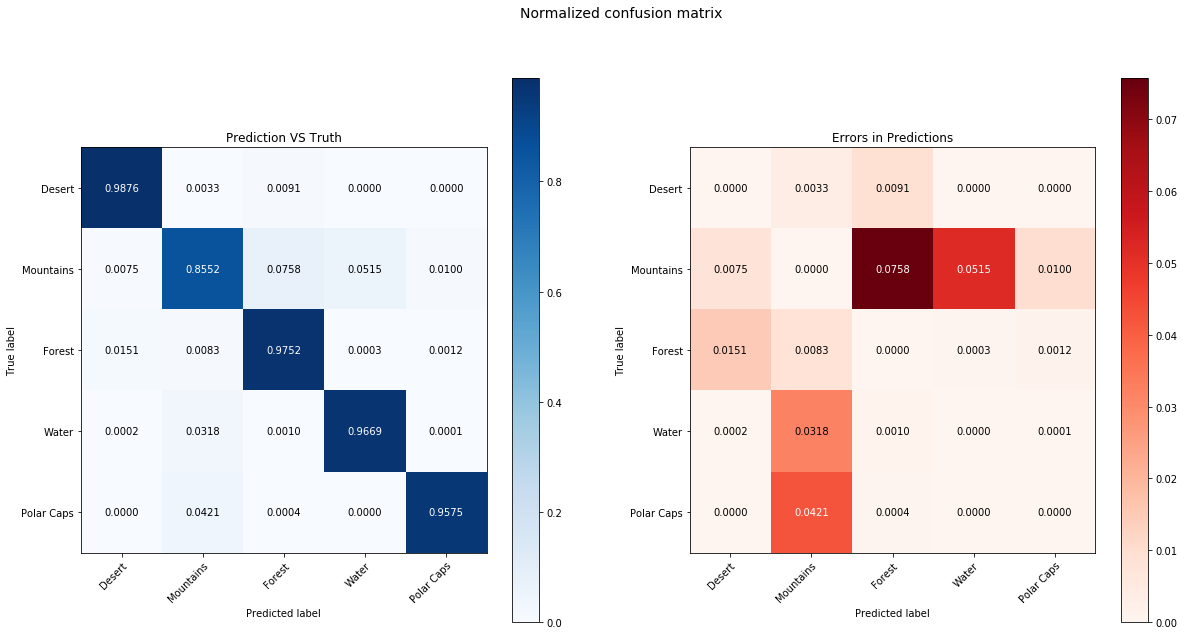

In [51]:
cms = plot_confusion_matrix_with0_diagonals(truth_512,predicts_512,normalize=True)
cms.savefig(projectpath+'/512by512_run2/'+'CMs.png',dpi=600)

In [52]:
cm = confusion_matrix(truth_512, predicts_512)
print(cm)
np.fill_diagonal(cm,0)
print(cm)

[[5792317   19604   53153      38       0]
 [  29398 3352692  296982  202077   39334]
 [  62631   34376 4055884    1379    4953]
 [   1151  155411    5079 4730758     483]
 [      4  200058    1925       0 4553273]]
[[     0  19604  53153     38      0]
 [ 29398      0 296982 202077  39334]
 [ 62631  34376      0   1379   4953]
 [  1151 155411   5079      0    483]
 [     4 200058   1925      0      0]]


# Running on 1x1 images

In [4]:
# Load the data
projectpath = "/home/lokeshmishra/PaleBlueDot/BernPhD/Projects/Terrain_Classifier/terrain_classifier"
df_training_150_1_1 = pd.read_pickle(projectpath+'/traincomposite_150_1_1_1.df')
df_testing_90_1_1 = pd.read_pickle(projectpath+'/testcomposite_90_1_1_1.df')
dict_dfnames = {0: df_training_150_1_1}
dict_dfnames_test = {0:df_testing_90_1_1}

In [8]:
# Create Numpy Array for Training

index=[]
iterations = 150
# nfiles = 50
size = 1
check = []
imagetrain1x1 = np.zeros((iterations,size,size,3),dtype = 'int')
temp2 = np.zeros((iterations,size,size,1),dtype='int')
labeltrain1x1 = np.zeros((iterations,size,size,5),dtype = 'int')
#Get random images and put them in an array    
for c in np.arange(iterations):
    imagetrain1x1[c,:,:,:]=dict_dfnames[0].iloc[1, c]
    temp2[c,:,:,:]=dict_dfnames[0].iloc[0,c]
print('Done with part 1')
# Fix the label array as required by the model
for c in np.arange(iterations):
    for ind1 in np.arange(size):
        for ind2 in np.arange(size):
            if temp2[c,ind1,ind2] == 0:
                labeltrain1x1[c,ind1,ind2]=[1,0,0,0,0]
            elif temp2[c,ind1,ind2] == 1:
                labeltrain1x1[c,ind1,ind2]=[0,1,0,0,0]
            elif temp2[c,ind1,ind2] == 2:
                labeltrain1x1[c,ind1,ind2]=[0,0,1,0,0]
            elif temp2[c,ind1,ind2] == 3:
                labeltrain1x1[c,ind1,ind2]=[0,0,0,1,0]
            elif temp2[c,ind1,ind2] == 4:
                labeltrain1x1[c,ind1,ind2]=[0,0,0,0,1]
# print(index)
print(imagetrain1x1.shape, labeltrain1x1.shape)

Done with part 1
(150, 1, 1, 3) (150, 1, 1, 5)


In [38]:
# Create Numpy Array for Testing

index=[]
iterations = 90
# nfiles = 50
size = 1
check = []
imagetest1x1 = np.zeros((iterations,size,size,3),dtype = 'int')
testlabels = np.zeros((iterations,size,size,1),dtype='int')
labeltest1x1 = np.zeros((iterations,size,size,5),dtype = 'int')
#Get random images and put them in an array    
for c in np.arange(iterations):
    imagetest1x1[c,:,:,:]=dict_dfnames_test[0].iloc[1, c]
    testlabels[c,:,:,:]=dict_dfnames_test[0].iloc[0,c]
print('Done with part 1')
# Fix the label array as required by the model
for c in np.arange(iterations):
    for ind1 in np.arange(size):
        for ind2 in np.arange(size):
            if testlabels[c,ind1,ind2] == 0:
                labeltest1x1[c,ind1,ind2]=[1,0,0,0,0]
            elif testlabels[c,ind1,ind2] == 1:
                labeltest1x1[c,ind1,ind2]=[0,1,0,0,0]
            elif testlabels[c,ind1,ind2] == 2:
                labeltest1x1[c,ind1,ind2]=[0,0,1,0,0]
            elif testlabels[c,ind1,ind2] == 3:
                labeltest1x1[c,ind1,ind2]=[0,0,0,1,0]
            elif testlabels[c,ind1,ind2] == 4:
                labeltest1x1[c,ind1,ind2]=[0,0,0,0,1]
# print(index)
print(imagetest1x1.shape, labeltest1x1.shape,testlabels.shape)

Done with part 1
(90, 1, 1, 3) (90, 1, 1, 5) (90, 1, 1, 1)


(<matplotlib.image.AxesImage at 0x7f24183ff748>, array([[[1, 0, 0, 0, 0]]]))

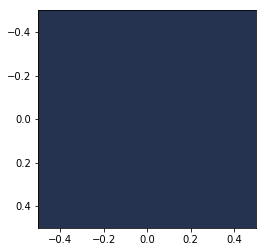

In [10]:
#Sanity check

plt.imshow(imagetrain1x1[11]),labeltrain1x1[11]

In [31]:
model_1x1 = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model_1x1.add(Dense(64, activation='relu',input_shape=(1,1,3)))
# Add another:
model_1x1.add(Dense(64, activation='relu'))
# Add another:
model_1x1.add(Dense(64, activation='relu'))
# Add another:
model_1x1.add(Dense(64, activation='relu'))
# Add a softmax layer with output units:
model_1x1.add(Dense(5, activation='softmax'))

model_1x1.compile(optimizer=Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
print(model_1x1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1, 1, 64)          256       
_________________________________________________________________
dense_22 (Dense)             (None, 1, 1, 64)          4160      
_________________________________________________________________
dense_23 (Dense)             (None, 1, 1, 64)          4160      
_________________________________________________________________
dense_24 (Dense)             (None, 1, 1, 64)          4160      
_________________________________________________________________
dense_25 (Dense)             (None, 1, 1, 5)           325       
Total params: 13,061
Trainable params: 13,061
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
from keras.utils.vis_utils import plot_model
plot_model(model_1x1, to_file='model_1x1.png', show_shapes=True,show_layer_names=True)

In [33]:
training1x1_1 = model_1x1.fit(imagetrain1x1[:120],labeltrain1x1[:120],validation_data = (imagetrain1x1[120:],labeltrain1x1[120:]),epochs=1000,batch_size=1024*10, verbose=2)

Train on 120 samples, validate on 30 samples
Epoch 1/1000
 - 0s - loss: 6.3235 - acc: 0.1417 - val_loss: 4.9432 - val_acc: 0.3333
Epoch 2/1000
 - 0s - loss: 4.4304 - acc: 0.4500 - val_loss: 4.5977 - val_acc: 0.3333
Epoch 3/1000
 - 0s - loss: 4.3095 - acc: 0.4583 - val_loss: 3.5720 - val_acc: 0.3333
Epoch 4/1000
 - 0s - loss: 3.4925 - acc: 0.4583 - val_loss: 2.7629 - val_acc: 0.3333
Epoch 5/1000
 - 0s - loss: 2.8747 - acc: 0.3167 - val_loss: 2.4066 - val_acc: 0.2667
Epoch 6/1000
 - 0s - loss: 2.6038 - acc: 0.2417 - val_loss: 2.0246 - val_acc: 0.2667
Epoch 7/1000
 - 0s - loss: 2.2077 - acc: 0.2417 - val_loss: 1.6660 - val_acc: 0.3000
Epoch 8/1000
 - 0s - loss: 1.7211 - acc: 0.3250 - val_loss: 1.6814 - val_acc: 0.3000
Epoch 9/1000
 - 0s - loss: 1.6430 - acc: 0.3083 - val_loss: 1.6216 - val_acc: 0.3333
Epoch 10/1000
 - 0s - loss: 1.5566 - acc: 0.3500 - val_loss: 1.4933 - val_acc: 0.4000
Epoch 11/1000
 - 0s - loss: 1.3552 - acc: 0.4583 - val_loss: 1.5580 - val_acc: 0.4333
Epoch 12/1000
 - 0

Epoch 96/1000
 - 0s - loss: 0.6232 - acc: 0.7583 - val_loss: 0.6996 - val_acc: 0.8333
Epoch 97/1000
 - 0s - loss: 0.6207 - acc: 0.7500 - val_loss: 0.6971 - val_acc: 0.8000
Epoch 98/1000
 - 0s - loss: 0.6179 - acc: 0.7500 - val_loss: 0.6938 - val_acc: 0.8000
Epoch 99/1000
 - 0s - loss: 0.6153 - acc: 0.7583 - val_loss: 0.6895 - val_acc: 0.8000
Epoch 100/1000
 - 0s - loss: 0.6125 - acc: 0.7500 - val_loss: 0.6879 - val_acc: 0.8000
Epoch 101/1000
 - 0s - loss: 0.6100 - acc: 0.7500 - val_loss: 0.6884 - val_acc: 0.8000
Epoch 102/1000
 - 0s - loss: 0.6076 - acc: 0.7583 - val_loss: 0.6872 - val_acc: 0.8000
Epoch 103/1000
 - 0s - loss: 0.6048 - acc: 0.7500 - val_loss: 0.6880 - val_acc: 0.8000
Epoch 104/1000
 - 0s - loss: 0.6022 - acc: 0.7583 - val_loss: 0.6876 - val_acc: 0.7667
Epoch 105/1000
 - 0s - loss: 0.5995 - acc: 0.7583 - val_loss: 0.6880 - val_acc: 0.8000
Epoch 106/1000
 - 0s - loss: 0.5970 - acc: 0.7500 - val_loss: 0.6863 - val_acc: 0.8000
Epoch 107/1000
 - 0s - loss: 0.5944 - acc: 0.75

Epoch 191/1000
 - 0s - loss: 0.4366 - acc: 0.8250 - val_loss: 0.5932 - val_acc: 0.8333
Epoch 192/1000
 - 0s - loss: 0.4348 - acc: 0.8250 - val_loss: 0.5953 - val_acc: 0.8333
Epoch 193/1000
 - 0s - loss: 0.4333 - acc: 0.8250 - val_loss: 0.5922 - val_acc: 0.8333
Epoch 194/1000
 - 0s - loss: 0.4315 - acc: 0.8250 - val_loss: 0.5918 - val_acc: 0.8333
Epoch 195/1000
 - 0s - loss: 0.4300 - acc: 0.8250 - val_loss: 0.5893 - val_acc: 0.8333
Epoch 196/1000
 - 0s - loss: 0.4284 - acc: 0.8250 - val_loss: 0.5891 - val_acc: 0.8333
Epoch 197/1000
 - 0s - loss: 0.4266 - acc: 0.8250 - val_loss: 0.5873 - val_acc: 0.8333
Epoch 198/1000
 - 0s - loss: 0.4248 - acc: 0.8250 - val_loss: 0.5840 - val_acc: 0.8333
Epoch 199/1000
 - 0s - loss: 0.4228 - acc: 0.8250 - val_loss: 0.5828 - val_acc: 0.8333
Epoch 200/1000
 - 0s - loss: 0.4217 - acc: 0.8250 - val_loss: 0.5872 - val_acc: 0.8333
Epoch 201/1000
 - 0s - loss: 0.4197 - acc: 0.8250 - val_loss: 0.5958 - val_acc: 0.8333
Epoch 202/1000
 - 0s - loss: 0.4185 - acc: 

 - 0s - loss: 0.3253 - acc: 0.8750 - val_loss: 0.5595 - val_acc: 0.9333
Epoch 286/1000
 - 0s - loss: 0.3243 - acc: 0.8750 - val_loss: 0.5745 - val_acc: 0.9333
Epoch 287/1000
 - 0s - loss: 0.3222 - acc: 0.8750 - val_loss: 0.5722 - val_acc: 0.9333
Epoch 288/1000
 - 0s - loss: 0.3209 - acc: 0.8667 - val_loss: 0.5545 - val_acc: 0.9333
Epoch 289/1000
 - 0s - loss: 0.3199 - acc: 0.8833 - val_loss: 0.5540 - val_acc: 0.9333
Epoch 290/1000
 - 0s - loss: 0.3188 - acc: 0.8750 - val_loss: 0.5568 - val_acc: 0.9333
Epoch 291/1000
 - 0s - loss: 0.3181 - acc: 0.8750 - val_loss: 0.5642 - val_acc: 0.9333
Epoch 292/1000
 - 0s - loss: 0.3167 - acc: 0.8833 - val_loss: 0.5633 - val_acc: 0.9667
Epoch 293/1000
 - 0s - loss: 0.3163 - acc: 0.8917 - val_loss: 0.5549 - val_acc: 0.9333
Epoch 294/1000
 - 0s - loss: 0.3144 - acc: 0.8750 - val_loss: 0.5611 - val_acc: 0.9333
Epoch 295/1000
 - 0s - loss: 0.3151 - acc: 0.8917 - val_loss: 0.5578 - val_acc: 0.9667
Epoch 296/1000
 - 0s - loss: 0.3146 - acc: 0.8917 - val_lo

Epoch 380/1000
 - 0s - loss: 0.5696 - acc: 0.8250 - val_loss: 0.6778 - val_acc: 0.8667
Epoch 381/1000
 - 0s - loss: 0.3983 - acc: 0.8500 - val_loss: 0.8487 - val_acc: 0.8333
Epoch 382/1000
 - 0s - loss: 0.5320 - acc: 0.8000 - val_loss: 0.6519 - val_acc: 0.8667
Epoch 383/1000
 - 0s - loss: 0.3930 - acc: 0.8583 - val_loss: 0.5276 - val_acc: 0.9667
Epoch 384/1000
 - 0s - loss: 0.4791 - acc: 0.8333 - val_loss: 0.5094 - val_acc: 0.9000
Epoch 385/1000
 - 0s - loss: 0.3861 - acc: 0.8500 - val_loss: 0.8748 - val_acc: 0.7667
Epoch 386/1000
 - 0s - loss: 0.4194 - acc: 0.7750 - val_loss: 0.7448 - val_acc: 0.8333
Epoch 387/1000
 - 0s - loss: 0.3541 - acc: 0.8250 - val_loss: 0.5350 - val_acc: 0.9333
Epoch 388/1000
 - 0s - loss: 0.3700 - acc: 0.8583 - val_loss: 0.5387 - val_acc: 0.9333
Epoch 389/1000
 - 0s - loss: 0.3695 - acc: 0.8583 - val_loss: 0.6270 - val_acc: 0.9333
Epoch 390/1000
 - 0s - loss: 0.4414 - acc: 0.8500 - val_loss: 0.4976 - val_acc: 0.9333
Epoch 391/1000
 - 0s - loss: 0.3131 - acc: 

 - 0s - loss: 0.2212 - acc: 0.9417 - val_loss: 0.5894 - val_acc: 0.9667
Epoch 475/1000
 - 0s - loss: 0.2208 - acc: 0.9333 - val_loss: 0.5945 - val_acc: 0.9667
Epoch 476/1000
 - 0s - loss: 0.2203 - acc: 0.9250 - val_loss: 0.5994 - val_acc: 0.9667
Epoch 477/1000
 - 0s - loss: 0.2202 - acc: 0.9250 - val_loss: 0.5966 - val_acc: 0.9667
Epoch 478/1000
 - 0s - loss: 0.2201 - acc: 0.9333 - val_loss: 0.5913 - val_acc: 0.9667
Epoch 479/1000
 - 0s - loss: 0.2194 - acc: 0.9333 - val_loss: 0.5957 - val_acc: 0.9667
Epoch 480/1000
 - 0s - loss: 0.2192 - acc: 0.9333 - val_loss: 0.5956 - val_acc: 0.9667
Epoch 481/1000
 - 0s - loss: 0.2193 - acc: 0.9250 - val_loss: 0.5902 - val_acc: 0.9667
Epoch 482/1000
 - 0s - loss: 0.2181 - acc: 0.9417 - val_loss: 0.5873 - val_acc: 0.9667
Epoch 483/1000
 - 0s - loss: 0.2180 - acc: 0.9333 - val_loss: 0.5915 - val_acc: 0.9667
Epoch 484/1000
 - 0s - loss: 0.2178 - acc: 0.9333 - val_loss: 0.5988 - val_acc: 0.9667
Epoch 485/1000
 - 0s - loss: 0.2172 - acc: 0.9333 - val_lo

Epoch 569/1000
 - 0s - loss: 0.1972 - acc: 0.9417 - val_loss: 0.6266 - val_acc: 0.9667
Epoch 570/1000
 - 0s - loss: 0.1935 - acc: 0.9417 - val_loss: 0.6244 - val_acc: 0.9667
Epoch 571/1000
 - 0s - loss: 0.1922 - acc: 0.9417 - val_loss: 0.6127 - val_acc: 0.9667
Epoch 572/1000
 - 0s - loss: 0.1946 - acc: 0.9417 - val_loss: 0.6410 - val_acc: 0.9667
Epoch 573/1000
 - 0s - loss: 0.1947 - acc: 0.9417 - val_loss: 0.6107 - val_acc: 0.9667
Epoch 574/1000
 - 0s - loss: 0.1935 - acc: 0.9417 - val_loss: 0.6162 - val_acc: 0.9667
Epoch 575/1000
 - 0s - loss: 0.1907 - acc: 0.9500 - val_loss: 0.6424 - val_acc: 0.9333
Epoch 576/1000
 - 0s - loss: 0.1945 - acc: 0.9417 - val_loss: 0.6083 - val_acc: 0.9667
Epoch 577/1000
 - 0s - loss: 0.2012 - acc: 0.9333 - val_loss: 0.6345 - val_acc: 0.9333
Epoch 578/1000
 - 0s - loss: 0.1971 - acc: 0.9417 - val_loss: 0.6245 - val_acc: 0.9667
Epoch 579/1000
 - 0s - loss: 0.1910 - acc: 0.9417 - val_loss: 0.6214 - val_acc: 0.9667
Epoch 580/1000
 - 0s - loss: 0.1954 - acc: 

 - 0s - loss: 0.1719 - acc: 0.9500 - val_loss: 0.6293 - val_acc: 0.9667
Epoch 664/1000
 - 0s - loss: 0.1729 - acc: 0.9500 - val_loss: 0.6219 - val_acc: 0.9667
Epoch 665/1000
 - 0s - loss: 0.1725 - acc: 0.9417 - val_loss: 0.6136 - val_acc: 0.9667
Epoch 666/1000
 - 0s - loss: 0.1700 - acc: 0.9500 - val_loss: 0.6118 - val_acc: 0.9667
Epoch 667/1000
 - 0s - loss: 0.1717 - acc: 0.9500 - val_loss: 0.6040 - val_acc: 0.9667
Epoch 668/1000
 - 0s - loss: 0.1705 - acc: 0.9417 - val_loss: 0.6174 - val_acc: 0.9667
Epoch 669/1000
 - 0s - loss: 0.1703 - acc: 0.9417 - val_loss: 0.6264 - val_acc: 0.9667
Epoch 670/1000
 - 0s - loss: 0.1705 - acc: 0.9500 - val_loss: 0.6120 - val_acc: 0.9667
Epoch 671/1000
 - 0s - loss: 0.1700 - acc: 0.9500 - val_loss: 0.6120 - val_acc: 0.9667
Epoch 672/1000
 - 0s - loss: 0.1695 - acc: 0.9500 - val_loss: 0.6254 - val_acc: 0.9667
Epoch 673/1000
 - 0s - loss: 0.1696 - acc: 0.9500 - val_loss: 0.6220 - val_acc: 0.9667
Epoch 674/1000
 - 0s - loss: 0.1687 - acc: 0.9417 - val_lo

Epoch 758/1000
 - 0s - loss: 0.1597 - acc: 0.9417 - val_loss: 0.6135 - val_acc: 0.9667
Epoch 759/1000
 - 0s - loss: 0.1572 - acc: 0.9417 - val_loss: 0.6129 - val_acc: 0.9667
Epoch 760/1000
 - 0s - loss: 0.1593 - acc: 0.9500 - val_loss: 0.6108 - val_acc: 0.9667
Epoch 761/1000
 - 0s - loss: 0.1543 - acc: 0.9500 - val_loss: 0.6095 - val_acc: 0.9667
Epoch 762/1000
 - 0s - loss: 0.1576 - acc: 0.9333 - val_loss: 0.6050 - val_acc: 0.9667
Epoch 763/1000
 - 0s - loss: 0.1524 - acc: 0.9417 - val_loss: 0.6123 - val_acc: 0.9667
Epoch 764/1000
 - 0s - loss: 0.1561 - acc: 0.9583 - val_loss: 0.6109 - val_acc: 0.9667
Epoch 765/1000
 - 0s - loss: 0.1533 - acc: 0.9583 - val_loss: 0.6071 - val_acc: 0.9667
Epoch 766/1000
 - 0s - loss: 0.1526 - acc: 0.9333 - val_loss: 0.6067 - val_acc: 0.9667
Epoch 767/1000
 - 0s - loss: 0.1555 - acc: 0.9500 - val_loss: 0.5993 - val_acc: 0.9667
Epoch 768/1000
 - 0s - loss: 0.1522 - acc: 0.9583 - val_loss: 0.6042 - val_acc: 0.9667
Epoch 769/1000
 - 0s - loss: 0.1524 - acc: 

 - 0s - loss: 0.1409 - acc: 0.9583 - val_loss: 0.5939 - val_acc: 0.9667
Epoch 853/1000
 - 0s - loss: 0.1413 - acc: 0.9583 - val_loss: 0.5946 - val_acc: 0.9667
Epoch 854/1000
 - 0s - loss: 0.1403 - acc: 0.9500 - val_loss: 0.6011 - val_acc: 0.9667
Epoch 855/1000
 - 0s - loss: 0.1406 - acc: 0.9583 - val_loss: 0.6001 - val_acc: 0.9667
Epoch 856/1000
 - 0s - loss: 0.1405 - acc: 0.9583 - val_loss: 0.5967 - val_acc: 0.9667
Epoch 857/1000
 - 0s - loss: 0.1406 - acc: 0.9583 - val_loss: 0.5971 - val_acc: 0.9667
Epoch 858/1000
 - 0s - loss: 0.1397 - acc: 0.9583 - val_loss: 0.5990 - val_acc: 0.9667
Epoch 859/1000
 - 0s - loss: 0.1402 - acc: 0.9583 - val_loss: 0.5954 - val_acc: 0.9667
Epoch 860/1000
 - 0s - loss: 0.1400 - acc: 0.9583 - val_loss: 0.5940 - val_acc: 0.9667
Epoch 861/1000
 - 0s - loss: 0.1400 - acc: 0.9583 - val_loss: 0.5956 - val_acc: 0.9667
Epoch 862/1000
 - 0s - loss: 0.1389 - acc: 0.9583 - val_loss: 0.6006 - val_acc: 0.9667
Epoch 863/1000
 - 0s - loss: 0.1398 - acc: 0.9583 - val_lo

Epoch 947/1000
 - 0s - loss: 0.1381 - acc: 0.9583 - val_loss: 0.5956 - val_acc: 0.9667
Epoch 948/1000
 - 0s - loss: 0.1376 - acc: 0.9583 - val_loss: 0.6017 - val_acc: 0.9667
Epoch 949/1000
 - 0s - loss: 0.1362 - acc: 0.9583 - val_loss: 0.5977 - val_acc: 0.9667
Epoch 950/1000
 - 0s - loss: 0.1363 - acc: 0.9417 - val_loss: 0.5946 - val_acc: 0.9667
Epoch 951/1000
 - 0s - loss: 0.1348 - acc: 0.9583 - val_loss: 0.5896 - val_acc: 0.9667
Epoch 952/1000
 - 0s - loss: 0.1360 - acc: 0.9583 - val_loss: 0.5916 - val_acc: 0.9667
Epoch 953/1000
 - 0s - loss: 0.1340 - acc: 0.9583 - val_loss: 0.5988 - val_acc: 0.9667
Epoch 954/1000
 - 0s - loss: 0.1339 - acc: 0.9583 - val_loss: 0.5963 - val_acc: 0.9667
Epoch 955/1000
 - 0s - loss: 0.1337 - acc: 0.9583 - val_loss: 0.5889 - val_acc: 0.9667
Epoch 956/1000
 - 0s - loss: 0.1346 - acc: 0.9583 - val_loss: 0.5901 - val_acc: 0.9667
Epoch 957/1000
 - 0s - loss: 0.1325 - acc: 0.9583 - val_loss: 0.5957 - val_acc: 0.9667
Epoch 958/1000
 - 0s - loss: 0.1321 - acc: 

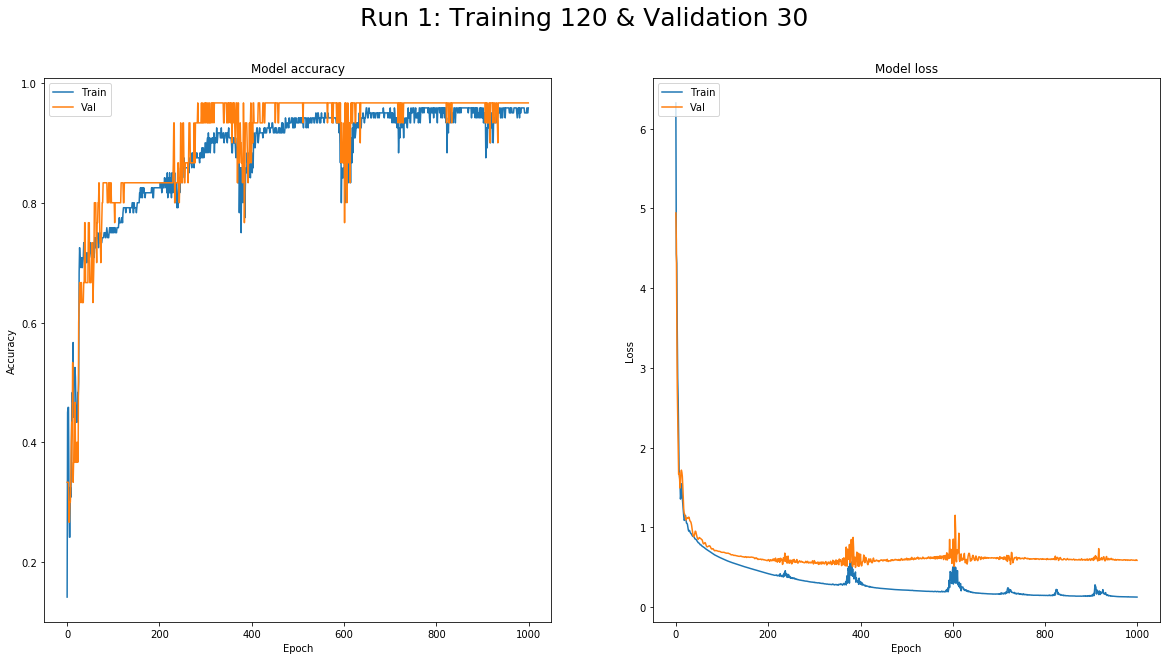

In [34]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Run 1: Training 120 & Validation 30', fontsize = 25)
# Plot training & validation accuracy values
fig.add_subplot(121)
plt.plot(training1x1_1.history['acc'])
plt.plot(training1x1_1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')


# Plot training & validation loss values
fig.add_subplot(122)
plt.plot(training1x1_1.history['loss'])
plt.plot(training1x1_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


fig.savefig(projectpath+'/1x1/'+'training.png',dpi=600)

In [36]:
test = model_1x1.evaluate(imagetest1x1[:],labeltest1x1[:], batch_size=2048, verbose=1)
print('The loss is %f and the accuracy is %f' %(test[0],test[1]))

90/90 [==============================] - 0s 42us/step
The loss is 0.698752 and the accuracy is 0.855556


## Evaluate Performance on 1x1 images

In [37]:
predictedlabels_1x1= model_1x1.predict(imagetest1x1[:], batch_size=2048)
predictedlabels_1x1.shape

(90, 1, 1, 5)

In [42]:
predictedlabels_1x1[0]

array([[[6.7322606e-01, 3.3354860e-05, 3.2665238e-01, 3.2526153e-09,
         8.8198576e-05]]], dtype=float32)

In [49]:
iterations=90
# ind1,ind2=0
predictedlabels_int_1x1 = np.zeros((90,1,1,1))
for nimage in np.arange(iterations):
#     print('I am reading image %d of %d'%(nimage,iterations))
    maxval = np.amax(predictedlabels_1x1[nimage])
    for nclass in np.arange(5):
        if predictedlabels_1x1[nimage,ind1,ind2][nclass] == maxval:
            predictedlabels_int_1x1[nimage] = nclass
predictedlabels_int_1x1.shape

(90, 1, 1, 1)

Normalized confusion matrix


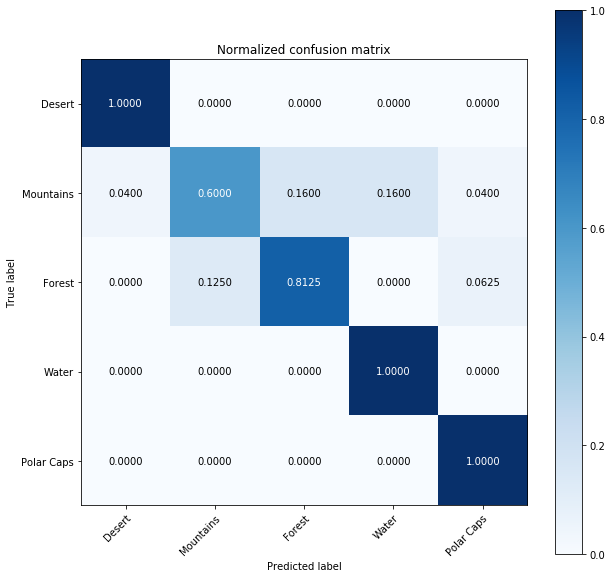

In [61]:
length = 90*1*1
truth_1x1 = np.reshape(testlabels,(length))
predicts_1x1 = np.reshape(predictedlabels_int_1x1,(length))
truth_1x1.shape,predicts_1x1.shape 

cm_1x1 = plot_confusion_matrix(truth_1x1,predicts_1x1,normalize=True)

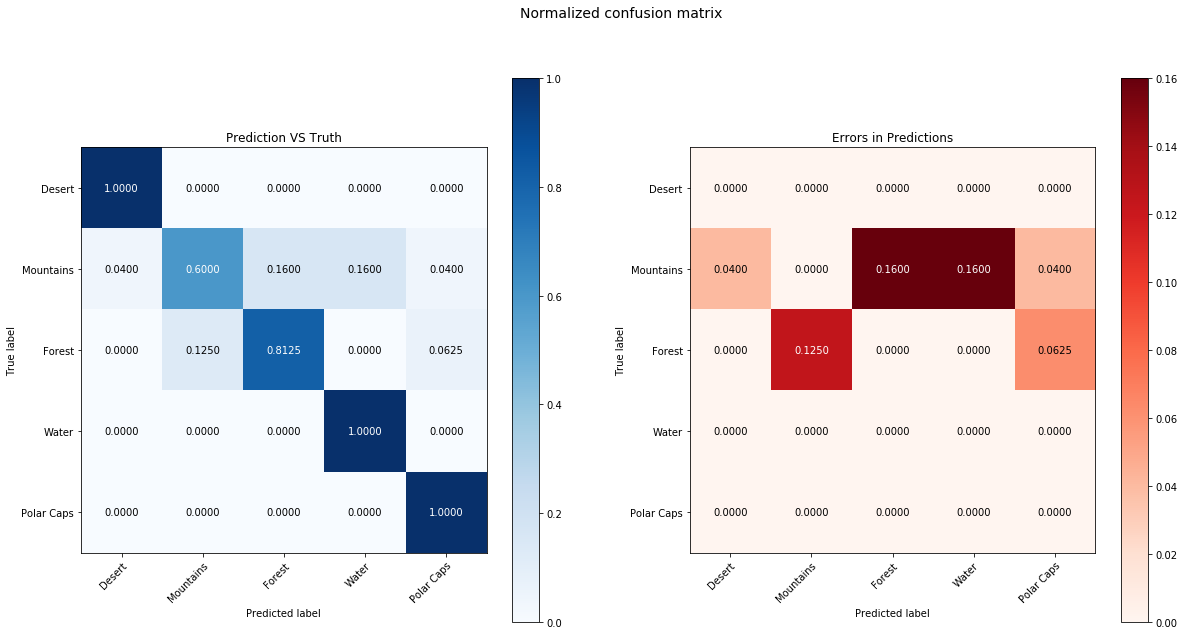

In [59]:
cms = plot_confusion_matrix_with0_diagonals(truth_1x1,predicts_1x1,normalize=True)
cms.savefig(projectpath+'/1x1/'+'CMs1x1.png',dpi=600)